In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
data = pd.read_csv('jobs_in_data.csv')

In [ ]:
data

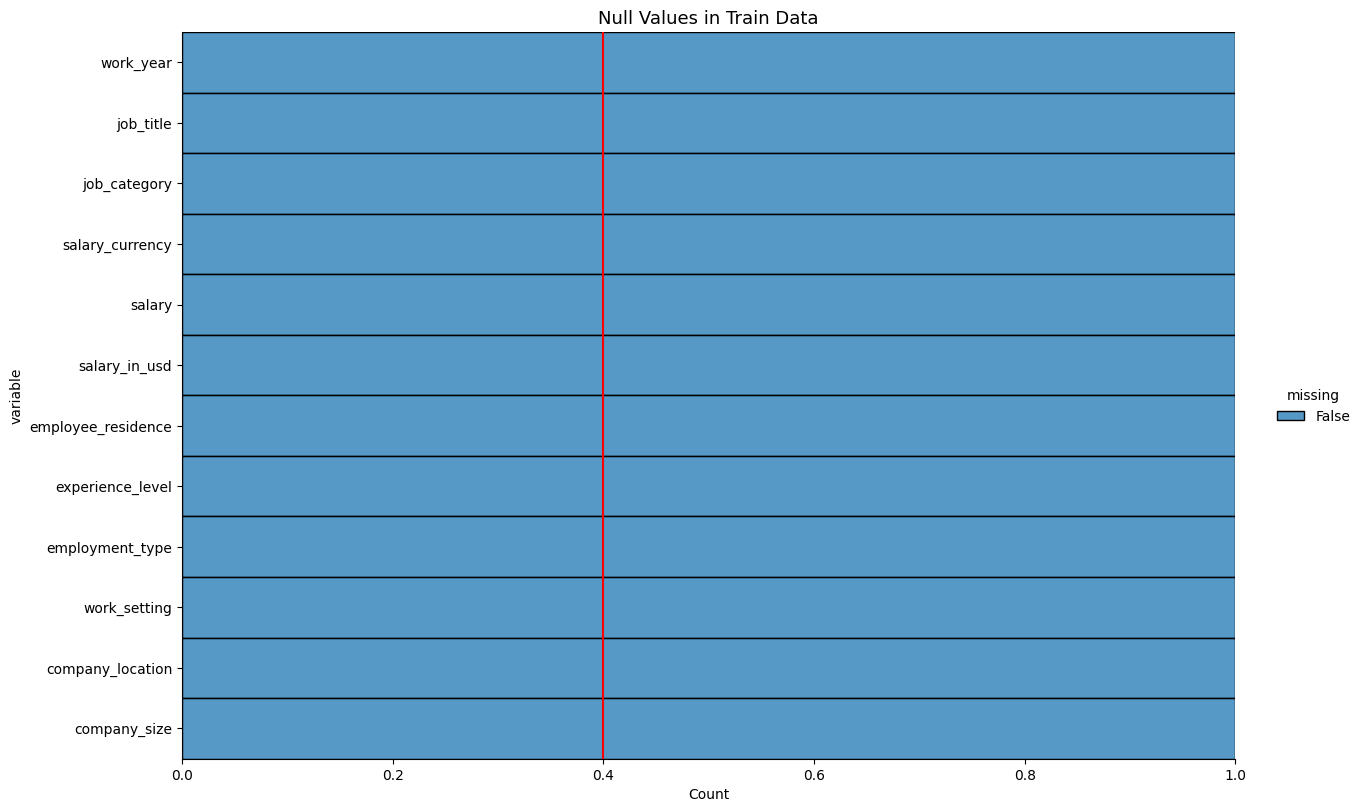

In [10]:
sns.displot(data=data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

In [3]:
count_cat = data.groupby(['work_year','job_category']).size().reset_index(name='size')
count_salary = data.groupby(['work_year','job_category'])['salary_in_usd'].mean().reset_index(name='salary_mean')
count_salary['salary_mean'] = round(count_salary['salary_mean']/1000,2)
count_salary['salary_mean'] = count_salary['salary_mean'].astype('str') + "  "+ "Thousand USD"
grouped_data = pd.merge(count_cat,count_salary,on=['work_year','job_category'])

In [4]:
fig = px.scatter(
    grouped_data,
    x='work_year',
    y='job_category',
    size='size',
    color='job_category',
    hover_name='salary_mean',
    size_max=50
)
fig.show()

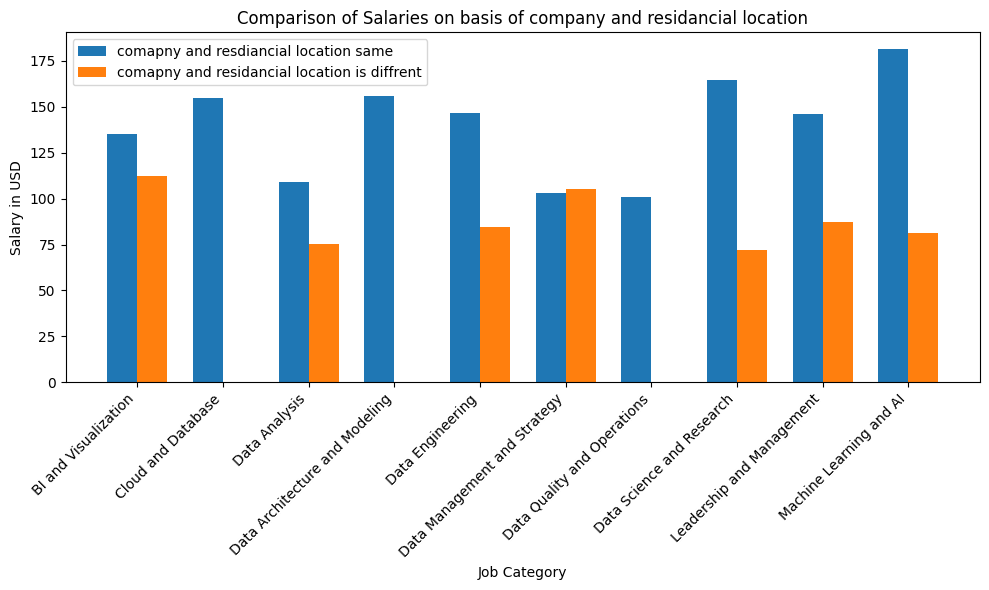

In [5]:
yes = data[data['company_location'] == data['employee_residence']]
no = data[data['company_location'] != data['employee_residence']]

yes = yes.groupby('job_category')['salary_in_usd'].mean().reset_index()
yes['salary_in_usd'] = round(yes['salary_in_usd']/1000,2)
yes['salary_in_usd_text'] = yes['salary_in_usd'].astype('str') + "  "+ "Thousand USD"
no = no.groupby('job_category')['salary_in_usd'].mean().reset_index()
no['salary_in_usd'] = round(no['salary_in_usd']/1000,2)
no['salary_in_usd_text'] = no['salary_in_usd'].astype('str') + "  "+ "Thousand USD"

merge_data = pd.merge(yes,no,on='job_category', how='outer',suffixes=('_sam','_no'))
merge_data.set_index('job_category',inplace=True)
job_category = merge_data.index


salary_yes = merge_data['salary_in_usd_sam']
salary_no = merge_data['salary_in_usd_no']

width = 0.35
positions_data1 = np.arange(len(job_category))
positions_data2 = positions_data1 + width

plt.figure(figsize=(10, 6))

plt.bar(positions_data1, salary_yes, width, label='comapny and resdiancial location same ')
plt.bar(positions_data2, salary_no, width, label='comapny and residancial location is diffrent')

plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.title('Comparison of Salaries on basis of company and residancial location')
plt.xticks(positions_data1 + width / 2, job_category, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


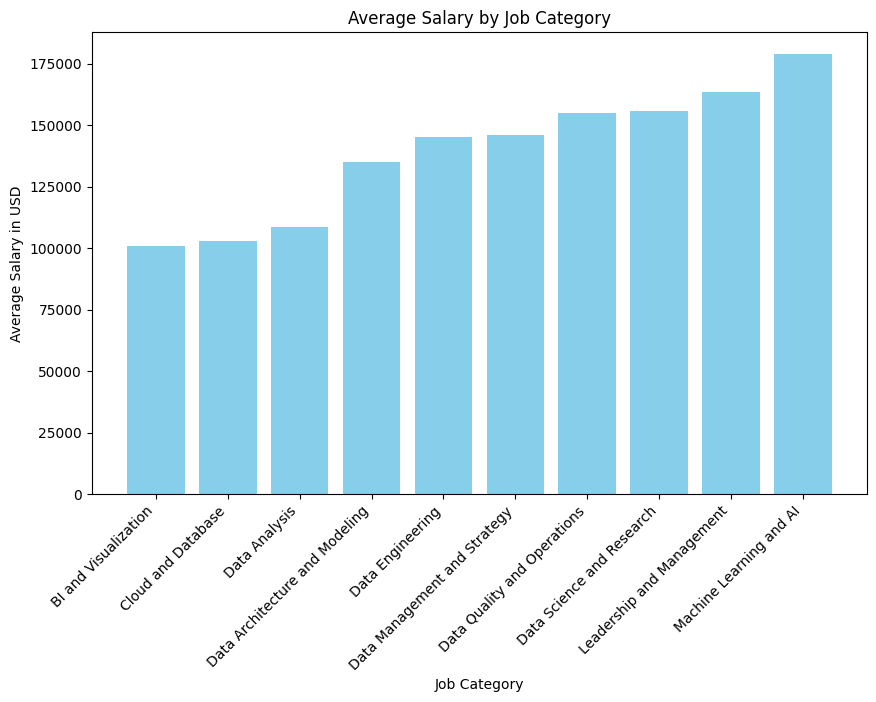

In [6]:
new = data.groupby(['job_category'])['salary_in_usd'].mean().reset_index()
new_sorted = new.sort_values(by='salary_in_usd', ascending=True)
plt.figure(figsize=(10,6))
plt.bar(new['job_category'],new_sorted['salary_in_usd'],color='skyblue')
plt.xlabel('Job Category')
plt.ylabel('Average Salary in USD')
plt.title(f'Average Salary by Job Category')
plt.xticks(rotation=45, ha='right')  
plt.show()

<AxesSubplot: xlabel='work_year', ylabel='job_category'>

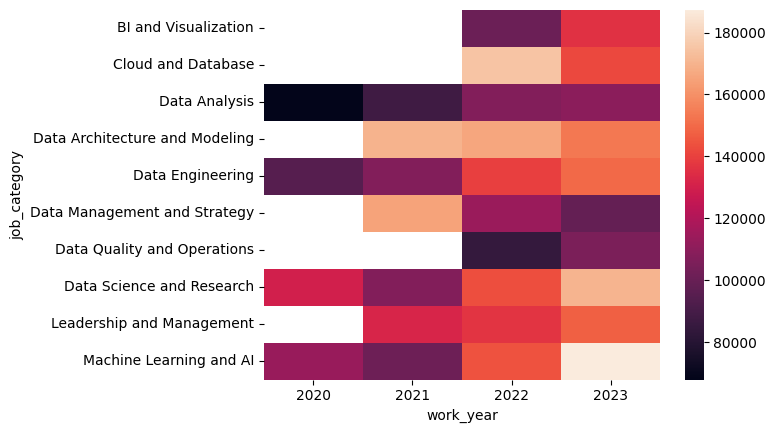

In [7]:
pivot_data = data.pivot_table(index='job_category', columns='work_year', values='salary_in_usd', aggfunc='mean')
sns.heatmap(pivot_data)

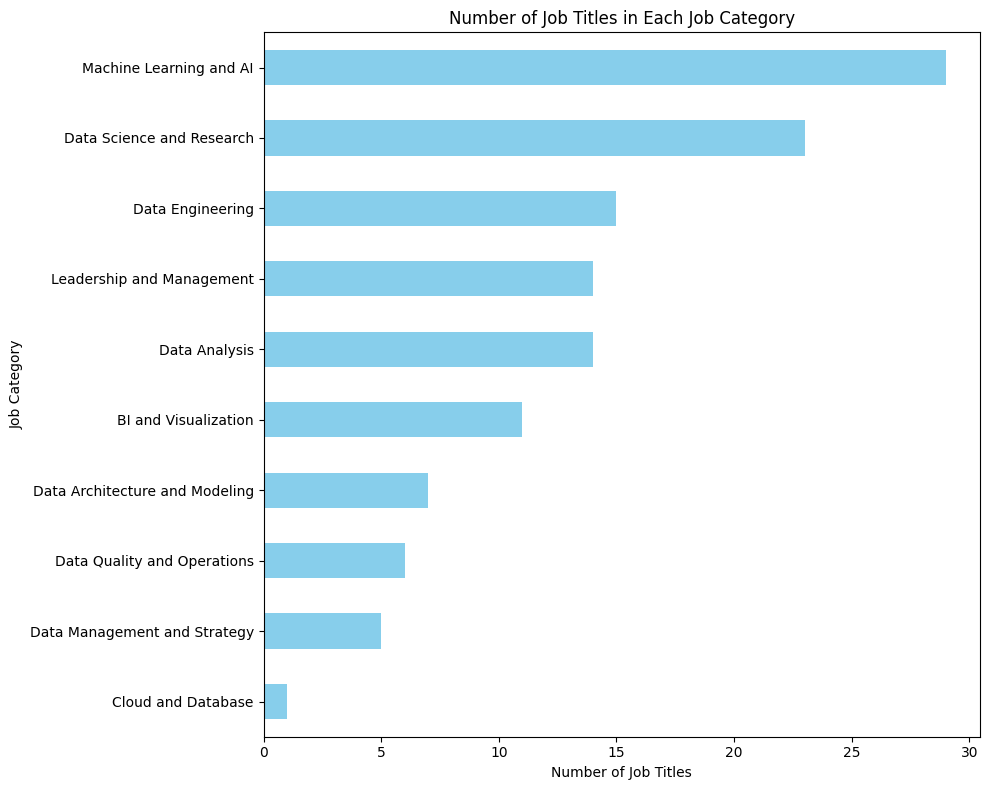

job_category
BI and Visualization              11
Cloud and Database                 1
Data Analysis                     14
Data Architecture and Modeling     7
Data Engineering                  15
Data Management and Strategy       5
Data Quality and Operations        6
Data Science and Research         23
Leadership and Management         14
Machine Learning and AI           29
Name: job_title, dtype: int64

In [8]:
title_counts = data.groupby('job_category')['job_title'].nunique()
plt.figure(figsize=(10, 8))
title_counts.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Job Titles')
plt.ylabel('Job Category')
plt.title('Number of Job Titles in Each Job Category')
plt.tight_layout()
plt.show()
title_counts


In [9]:
grouped_data = data.groupby(['job_category','job_title'])['salary_in_usd'].mean().reset_index()
fig = px.bar(grouped_data,
            x='job_title',
            y='salary_in_usd',
            color='job_category',
            title='salry mean of each job title title',
            height=800,
            width=1000)
fig.update_layout(xaxis_title = 'job title', yaxis_title='mean salary in usd')
fig.show()

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

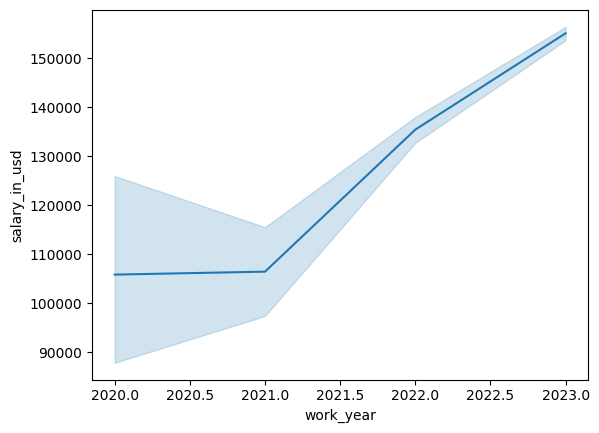

In [10]:
sns.lineplot(data,x='work_year',y='salary_in_usd')

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

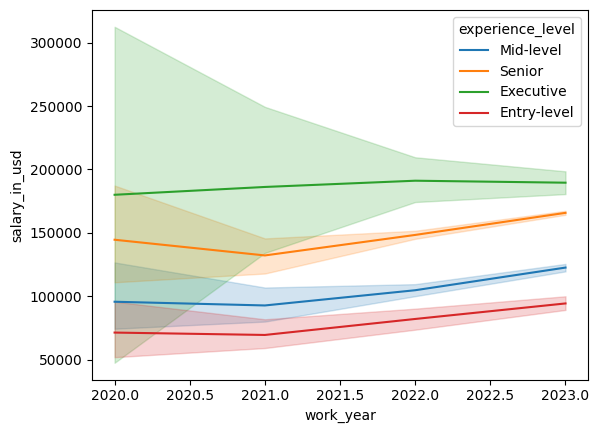

In [11]:
sns.lineplot(data,x='work_year',y='salary_in_usd',hue='experience_level')

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

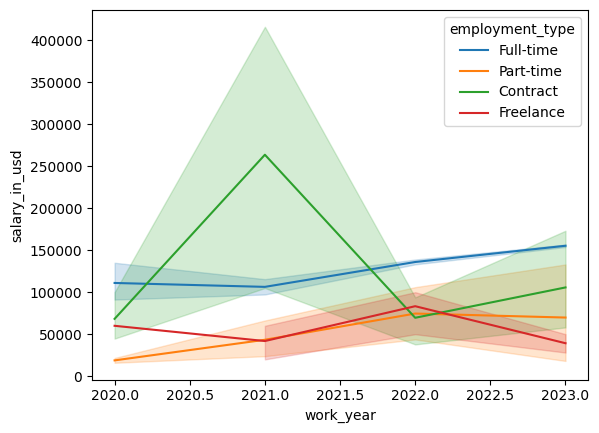

In [12]:
sns.lineplot(data,x='work_year',y='salary_in_usd',hue='employment_type')

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

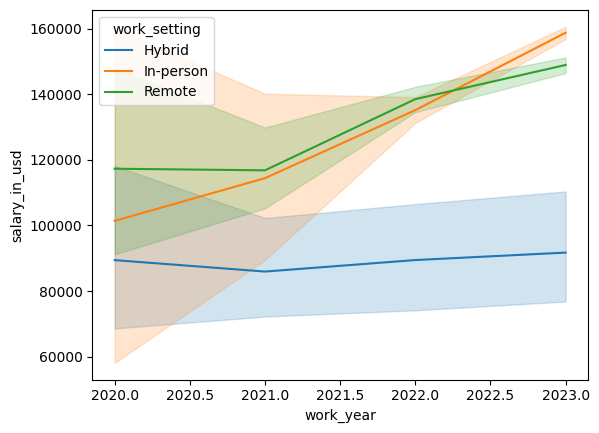

In [13]:
sns.lineplot(data,x='work_year',y='salary_in_usd',hue='work_setting')

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

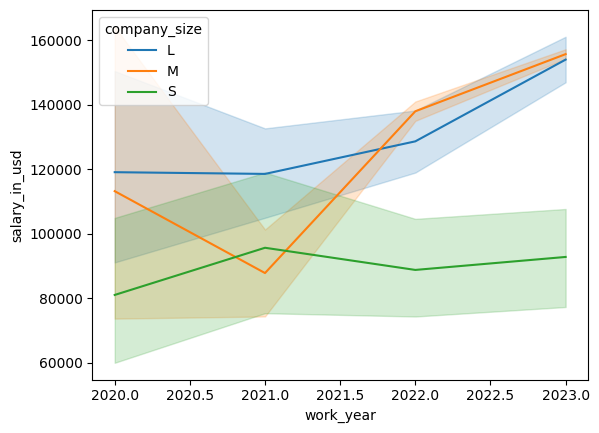

In [14]:
sns.lineplot(data,x='work_year',y='salary_in_usd',hue='company_size')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', ax=axes[0, 0])
axes[0, 0].set_title('Salary vs Work Year (Company Size)')

# Plot 2
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='work_setting', ax=axes[0, 1])
axes[0, 1].set_title('Salary vs Work Year (Work Setting)')

# Plot 3
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='employment_type', ax=axes[1, 0])
axes[1, 0].set_title('Salary vs Work Year (Employment Type)')

# Plot 4
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='experience_level', ax=axes[1, 1])
axes[1, 1].set_title('Salary vs Work Year (Experience Level)')

# Set x-axis ticks to specific years
years = data['work_year'].values
for ax in axes.flat:
    ax.set_xticks(years)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


KeyboardInterrupt: 

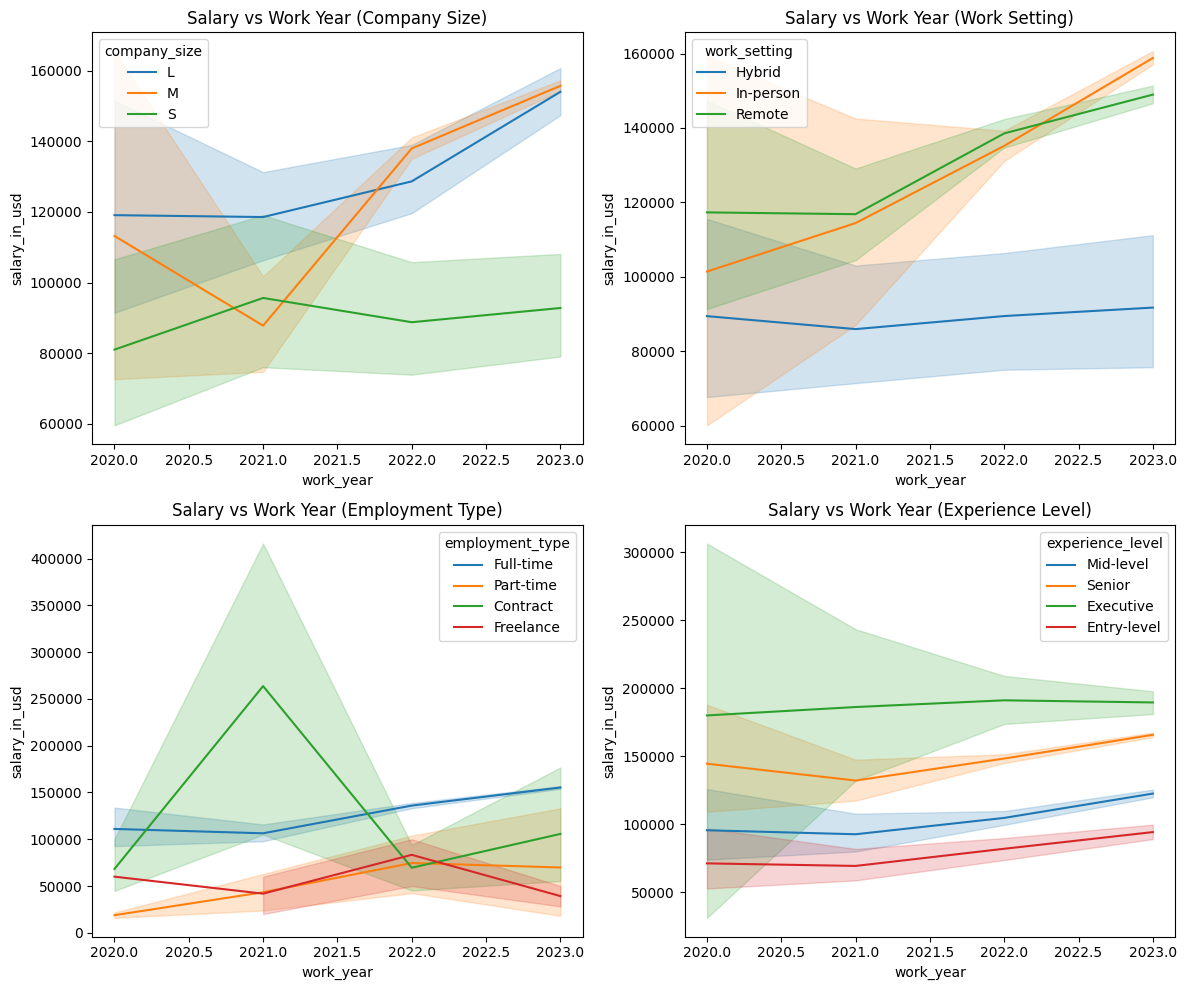

In [15]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', ax=axes[0, 0])
axes[0, 0].set_title('Salary vs Work Year (Company Size)')


sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='work_setting', ax=axes[0, 1])
axes[0, 1].set_title('Salary vs Work Year (Work Setting)')


sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='employment_type', ax=axes[1, 0])
axes[1, 0].set_title('Salary vs Work Year (Employment Type)')

sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='experience_level', ax=axes[1, 1])
axes[1, 1].set_title('Salary vs Work Year (Experience Level)')

plt.tight_layout()


plt.show()


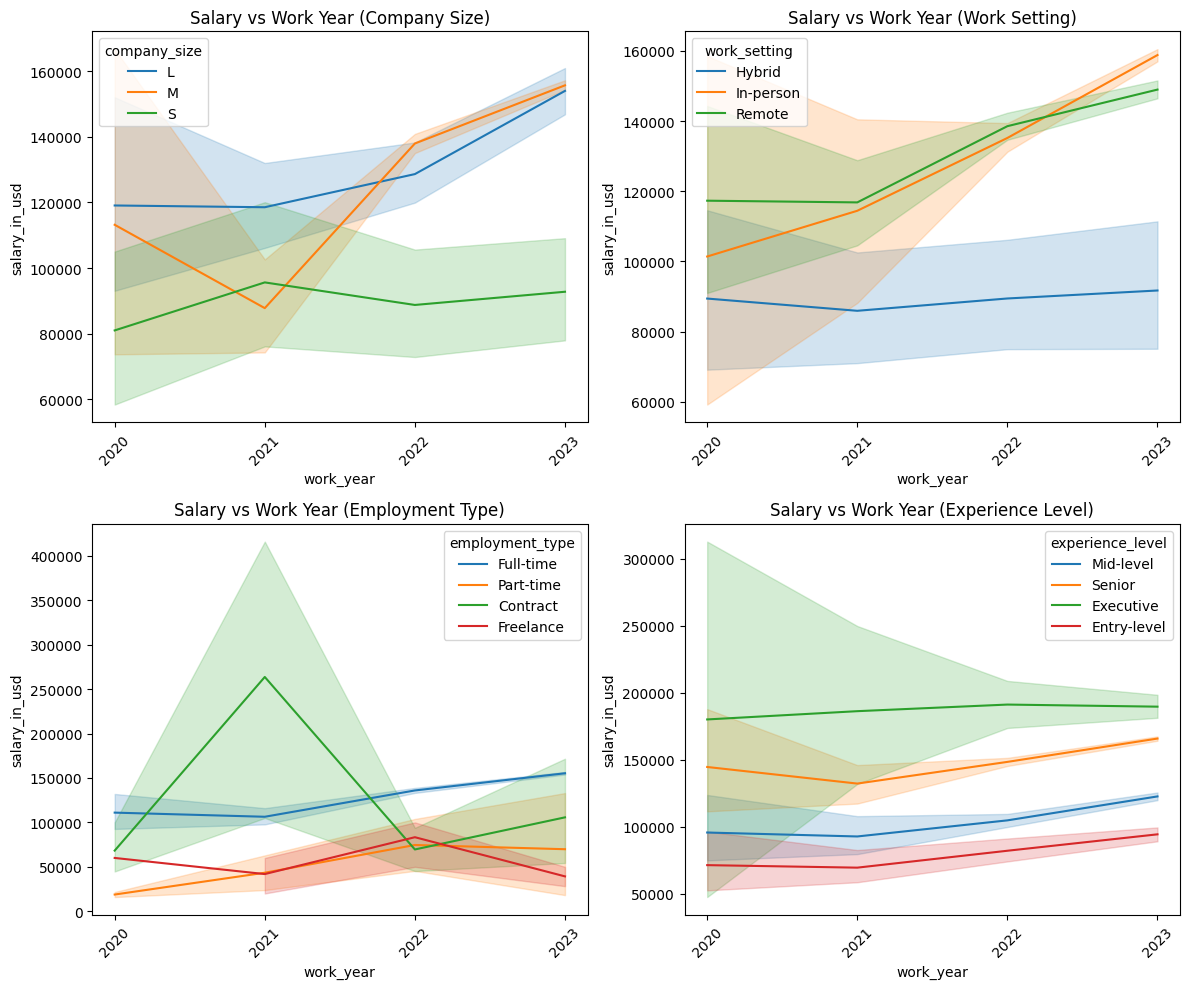

In [18]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', ax=axes[0, 0])
axes[0, 0].set_title('Salary vs Work Year (Company Size)')


sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='work_setting', ax=axes[0, 1])
axes[0, 1].set_title('Salary vs Work Year (Work Setting)')

sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='employment_type', ax=axes[1, 0])
axes[1, 0].set_title('Salary vs Work Year (Employment Type)')

sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='experience_level', ax=axes[1, 1])
axes[1, 1].set_title('Salary vs Work Year (Experience Level)')

for ax in axes.flat:
    ax.set_xticks(data['work_year'].unique())  # Set the unique work_year values as ticks
    ax.set_xticklabels(data['work_year'].unique(), rotation=45)  # Rotate labels for better readability


plt.tight_layout()


plt.show()
